In [2]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)
print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


    Humidity  Temperature  Spot Size   Density  Disease
0  72.604297    10.693307   3.334992  0.169062        0
1  56.702163    19.555932   1.207029  0.612021        0
2  65.471055    33.831273   6.889667  0.460106        0
3  90.686568    15.554963   9.722947  0.378008        0
4  40.283131    17.628153   7.290564  0.935565        0
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



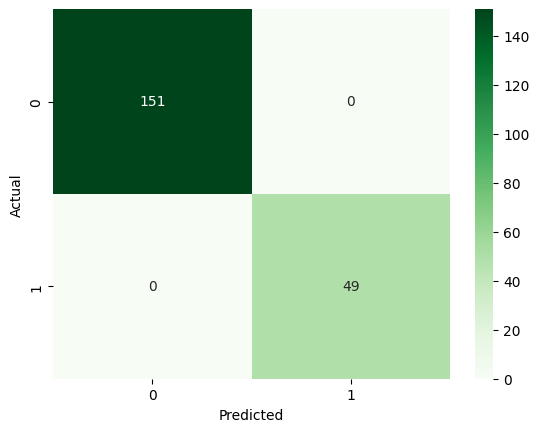

In [8]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Крок 1: Генерація штучних даних для характеристик листя
np.random.seed(100)
data_size = 1000

# Створення фіч (характеристик): вологість, температура, розмір плям, щільність
humidity = np.random.uniform(40, 100, data_size)      # Вологість
temperature = np.random.uniform(10, 35, data_size)    # Температура
spot_size = np.random.uniform(1, 10, data_size)       # Розмір плям на листі
density = np.random.uniform(0.1, 1.0, data_size)      # Щільність плям

# Створення міток (0 - здоровий лист, 1 - хворий)
# Наприклад, лист є хворим, якщо розмір плям > 5, щільність > 0.5, і вологість > 60
labels = (spot_size > 5) & (density > 0.5) & (humidity > 60)
labels = labels.astype(int)  # Конвертуємо в 0 або 1

# Створення DataFrame
df = pd.DataFrame({
    'Humidity': humidity,
    'Temperature': temperature,
    'Spot Size': spot_size,
    'Density': density,
    'Disease': labels
})

# Перевіримо кілька перших рядків даних
print(df.head())

# Крок 2: Поділ даних на фічі (X) і мітки (y)
X = df.drop('Disease', axis=1)  # Характеристики
y = df['Disease']               # Мітки (здоровий/хворий)

# Поділ даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних для покращення моделі
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Крок 3: Тренування моделі Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test_scaled)

# Крок 4: Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Повний звіт класифікації
print("Classification Report:\n", classification_report(y_test, y_pred))

# Матриця плутанини
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
